In [1]:
import pickle
predir = './Datasets/gowalla/'
trnfile = predir + 'trn_mat_time'
with open(trnfile, 'rb') as fs:
    trnMat = pickle.load(fs)
subMat = trnMat[1]

In [3]:
import numpy as np

In [17]:
subMat[1][1].toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
len(np.nonzero(subMat[1][1].toarray())[0])

0

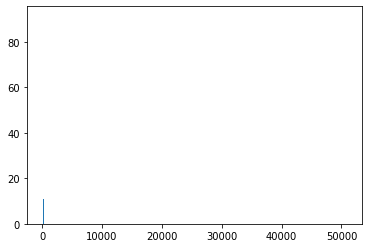

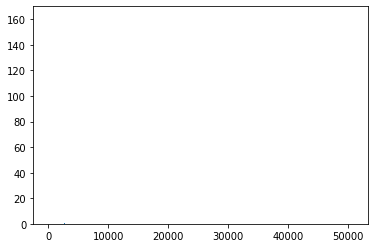

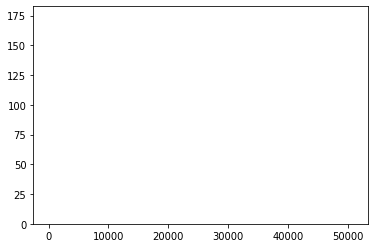

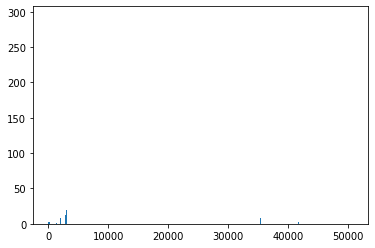

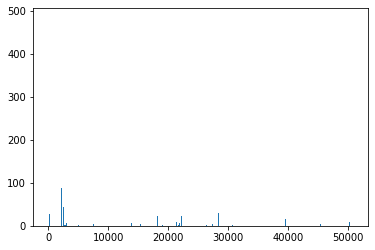

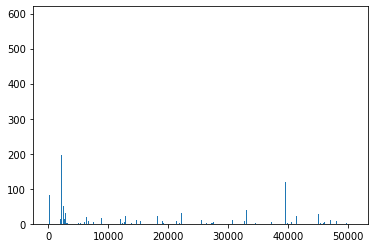

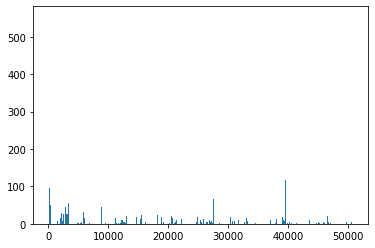

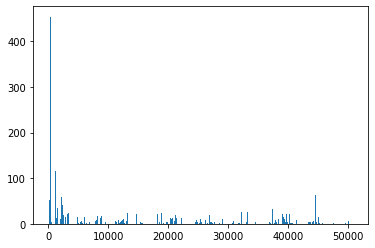

In [8]:
def freedman_diaconis(x):
    """
    :param x: 输入数据
    :return num_bin: 条柱数目
    """
    static = x.describe()
    IQR = static["75%"] - static["25%"]
    bin_width = (2 * IQR) / np.power(x.shape[0], 1 / 3)
    x_max, x_min = static["max"], static["min"]
    num_bin = int(((x_max - x_min) / bin_width) + 1)
    return num_bin

from matplotlib import pyplot as plt
from pandas.core.frame import DataFrame
import seaborn as sns
df=list()
for k in range(8):
    count=list()
    indexs=list()
    for j in range(50821):
        count.append(len(np.nonzero(subMat[k][j].toarray())[0]))
        indexs.append(j)
    plt.figure()
    c={"user":indexs,"length" : count}#将列表a，b转换成字典
    data=DataFrame(c)#将字典转换成为数据框
    df.append(data)
    # plt.ylim((0, data.max()))
    plt.bar(data.user, data.length)
    plt.show()

In [10]:
for i in range(8):
    print("graph",i,":",len(df[i][df[i].length==0]),len(df[i][df[i].length==0])/50821,"mean length",df[i].mean()['length'])

graph 0 : 50717 0.9979536018574998 mean length 0.017866629936443595
graph 1 : 50724 0.9980913401940142 mean length 0.01361641840971252
graph 2 : 50684 0.9973042639853604 mean length 0.02190039550579485
graph 3 : 49699 0.977922512347258 mean length 0.22994431435823773
graph 4 : 46261 0.9102733122134551 mean length 1.0230219791031268
graph 5 : 40327 0.7935105566596485 mean length 2.3852147734204365
graph 6 : 33474 0.6586647252120187 mean length 3.8376065012494833
graph 7 : 29107 0.5727356801322288 mean length 4.132602664252966


In [21]:
trnMat

[<50821x57440 sparse matrix of type '<class 'numpy.float64'>'
 	with 1241874 stored elements in Compressed Sparse Row format>,
 [<108261x108261 sparse matrix of type '<class 'numpy.float64'>'
  	with 1816 stored elements in Compressed Sparse Row format>,
  <108261x108261 sparse matrix of type '<class 'numpy.float64'>'
  	with 1384 stored elements in Compressed Sparse Row format>,
  <108261x108261 sparse matrix of type '<class 'numpy.float64'>'
  	with 2226 stored elements in Compressed Sparse Row format>,
  <108261x108261 sparse matrix of type '<class 'numpy.float64'>'
  	with 23372 stored elements in Compressed Sparse Row format>,
  <108261x108261 sparse matrix of type '<class 'numpy.float64'>'
  	with 103982 stored elements in Compressed Sparse Row format>,
  <108261x108261 sparse matrix of type '<class 'numpy.float64'>'
  	with 242438 stored elements in Compressed Sparse Row format>,
  <108261x108261 sparse matrix of type '<class 'numpy.float64'>'
  	with 390062 stored elements in C